<div style="text-align:center;">
  <img src="https://github.com/MolSSI-Education/iqb-2025/blob/main/images/molssi_main_outline.png?raw=true" style="display: block; margin: 0 auto; max-height:325px;">
</div>

# Digital Representation of Molecules

This tutorial was written by Paul Craig (RIT Professor) and Jessica Nash (Software Scientist) for the [Cheminformatic-Driven Molecular Docking Workshop](https://pdb101.rcsb.org/news/67d9853eaddf75595bd158f7) held as a Crash Course with the Institute for Quantitative Biomedicine (IQB) and the Protein Data Bank (PDB).

*This notebook is Part 1 of 4 in the notebook series.*

Other notebooks in this series:
1. ***Digital Representation of Molecules*** (This notebook)
2. [Exploring Chemical and Biological Data with BindingDB and the RDKit](https://colab.research.google.com/github/MolSSI-Education/iqb-2025/blob/main/02_Cheminfo_crash_course.ipynb)
3. [Preparing Structures for Docking](https://colab.research.google.com/github/MolSSI-Education/iqb-2025/blob/main/03_Cheminfo_crash_course.ipynb)
4. [Molecular Docking using gnina](https://colab.research.google.com/github/MolSSI-Education/iqb-2025/blob/main/04_Cheminfo_crash_course.ipynb)

In this notebook, we will learn how to represent chemical structures as SMILES, how to use SMILES to create RDKit mol objects, and how to explore and visualize chemical data using pandas dataframes. This notebook is based on notebooks 01-05 from the [MolSSI Cheminformatics course](https://github.com/MolSSI-Education/molssi-cheminformatics), which was created by Jessica Nash from The Molecular Sciences Software Institute.


In [1]:
# @title Overview
%%html
<style>
div.alert {
    color: #0056b3;
    background-color: #d9edf7;
    border-left: 5px solid #31708f;
    padding: 0.5em;
    font-size: 1.25em;
    line-height: 1.5;
}
div.alert ul {
    margin: 0.5em 0;
}
div.alert li {
    margin-bottom: 0.5em;
}
</style>

<div class="alert alert-block alert-info">
    <strong>Questions:</strong>
    <ul>
        <li>How are molecules represented on computers?</li>
        <li>What is a SMILES?</li>
        <li>What are common molecular file formats?</li>
   </ul>

    <strong>Objectives:</strong>
    <ul>
        <li>Learn the basics of SMILES.</li>
        <li>Convert molecules from chemical formula and structures to SMILES.</li>
    </ul>
</div>

## Molecular Representations of Biological Molecules for Computing

In bioinformatics, if you work with genomics you are accustomed to working with DNA sequences. For example, this is a partial DNA sequence for human dihdydrofolate reductase, an important enzyme in nucelotide metabolism.

```
GAATTCATGAAAACGTAGCTCGTCCTCAAAAAAAACAGAAGAGGAGTAATCATTTTAAGGGAGAAATATA
TACGAAAGGAACAAGATTTTGAAGCACCCAAGCTGCCACCTACATTAAAACACGGTAGGTGGCTAAACAC
CAGTCTTCAATGCCCTTCCACAGCCTCAGTCTGAAAAATACTGTGCAGGTGACCCAAGTGAGGGGTCACC
CTTGGGCTTTTCCTGTGGCAGTATCTCTGGTTTAAAAACAAACAAACGTACTTATTGCGTTGAAGGACGG
CAACAGGAAGGACTCCATGATTAGTCACATCTATACCATCCTAAGAAACTTTATCCACCCAAACTGTATT
TCAGACTTTATAATCTAAACTACAAAAAGTGTTCACTGGGGAACTGCACAATATGACTGCTTTTAACCGT
```

The DNA sequence shown here is a simplified representation of a very complex 3D structure that is part of a chromosome, an enormously complex structure. The sequence that represents this gene can be used as a string in coding - computation with strings is orders of magnitude faster than computation with 3D structures. And we can still learn a great deal about this gene simply by exploring the sequence. Likewise we can represent the RNA transcribed from this sequence as a list of characters where T is replaced by U.

If you study proteins or proteomics, you know that protein function depends on protein structure. Protein structures involve 20 (or more) building blocks so the sequences are more complex, but the principle of representing the protein as a simple string for ease with computing still applies. Here is the sequence of the dihydrofolate reductase protein that is coded in this gene sequence above.

```
MVGSLNCIVAVSQNMGIGKNGDLPWPPLRNEFRYFQRMTTTSSVEGKQNLVIMGKKTWFSIPEKNRPLKG
RINLVLSRELKEPPQGAHFLSRSLDDALKLTEQPELANKVDMVWIVGGSSVYKEAMNHPGHLKLFVTRIM
QDFESDTFFPEIDLEKYKLLPEYPGVLSDVQEEKGIKYKFEVYEKND
```

As we move into cheminformatics, we often want to convert small molecule structures, like the aspirin shown here, into strings for computing ease.

![Aspirin.png](https://drive.google.com/uc?export=view&id=1hcWaacd-pIb09Wi9dceVSQIfkXgWC-vD)

There are three well-known string conversions for small molecules, SMILES, InChI, and InChI Key. Here are the SMILES, InChI, and InChI Key strings for aspirin.

SMILES: CC(=O)OC1=CC=CC=C1C(=O)O

InChI: 1S/C9H8O4/c1-6(10)13-8-5-3-2-4-7(8)9(11)12/h2-5H,1H3,(H,11,12)

InChI Key: BSYNRYMUTXBXSQ-UHFFFAOYSA-N

In this workshop we will use SMILES strings. SMILES syntax is explained below.

## Simplified Molecular-Input Line-entry System: SMILES

SMILES stands for "Simplified Molecular-Input Line-Entry System" and is a way to represent molecules as a string of characters.

Consider the molecule ethanol. The image below shows a representation that we are used to seeing in chemistry:

![ethanol](https://drive.google.com/uc?export=view&id=1pBnnNujVdkw43xpDOM27nzICgnn7EqJj)

However, the SMILES representation of this molecule would be "CCO".

You can read more about SMILES at [this tutorial](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html), but rules for atoms and bonds are also repeated below.

### Atoms
SMILES supports all elements in the periodic table. An atom is represented using its respective atomic symbol. Upper case letters refer to non-aromatic atoms; lower case letters refer to aromatic atoms. If the atomic symbol has more than one letter the second letter must be lower case.

### Bonds
```
-	Single bond
=	Double bond
#	Triple bond
*	Aromatic bond
.	Disconnected structures
```
Single bonds are the default and therefore need not be entered. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical ethane. It is also assumed that the bond between two lower case atom symbols is aromatic. A blank terminates the SMILES string.

### Branches

A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis. Some examples:

```

CC(O)C	2-Propanol
CC(=O)C	2-Propanone
```

### Rings

A ring is specified by placing a number directly after the SMILES symbol where the ring closure occurs. This number acts as a marker, indicating that the atoms with the same number are connected, thus forming a ring. For instance:

```
C1CCCC1   cyclopentane
n1ccccc1  Pyridine
```

### SMILES Examples

![SMILES Example 1](https://drive.google.com/uc?export=view&id=1-MFSoAGwqOPiqIUD06reOkBPx4BTMhGC)

![SMILES Example 2](https://drive.google.com/uc?export=view&id=18Ub9L98y8cL_lDLF9wl6pLQxCkt8JFqu)

### Using Online Resources
Most of the time, you will not need to write a SMILES string by hand. You will be able to look up a molecule's SMILES string from a web database like [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

You can also use tools like this [molecule sketcher from the Protein Data Bank](https://www.rcsb.org/chemical-sketch)
to draw molecules and get their SMILES strings.

In [2]:
# @title Exercise
%%html
<style>
div.orange-alert {
    color: #854f00; /* Darker shade of orange for text */
    background-color: #ffe6cc; /* Light orange background */
    border-left: 5px solid #ff9933; /* Bright orange border */
    padding: 0.5em;
    font-size: 1.25em; /* Matches the surrounding text size */
    line-height: 1.5; /* Ensures readability */
}
div.orange-alert ul {
    margin: 0.5em 0; /* Space around the list */
}
div.orange-alert li {
    margin-bottom: 0.5em; /* Space between list items */
}
</style>

<div class="orange-alert">

<strong>Exercise</strong>
<p>
Based on what you've learned about SMILES strings, answer the following questions:
</p>
    <ol>
        <li> What is the SMILES for ethanol?</li>
        <li> What is the SMILES for water?</li>
        <li> What is the SMILES for benzene?</li>
        <li> What molecule is represented by the SMILES O=C=O?</li>
        <li> What is the SMILES for an amide group?<//li>
        <li> What is the SMILES for a 4 membered carbon chain with an amide group on the second carbon?</li>
    </ol>
</p>
<p>Check your answers from this previous exercise using the PDB molecule sketcher. Notice that you can type in a SMILES string and have the sketcher draw the molecule for you.</p>
</div>

In [3]:
# TO DO: Fill in your answers here:
# 1.
# 2.
# 3.
# 4.
# 5.
# 6. CC(C(=O)N)CC


## Molecular File Formats

Molecules can also be represented using a number of different file formats. As you work more in chemistry, you may see a number of these. Sometimes you will have to pick a file format based on the software you are using or the molecular information you want to save.

| File Format | Description                                                                 | Features                                                              | Common Uses                              |
|-------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------|------------------------------------------|
| SMILES      | Simplified Molecular Input Line Entry System                                | Line notation for representing molecular structures                   | Database               |
| InChI       | International Chemical Identifier                                           | Textual identifier for chemical substances                            | Databases             |
| MOL/SDF     | MDL MOLfile and Structure-Data File                                         | Contains 2D/3D coordinates, atoms, bonds                              | Structure visualization, cheminformatics |
| PDB         | Protein Data Bank format                                                    | Often used for 3D structures of proteins and nucleic acids,but can also be used for small molecules. Often does not contain molecule information, and cannot store partial charges.                           | Structural biology, bioinformatics       |
| XYZ         | Cartesian coordinates                                                       | Simple text format with atom types and 3D coordinates                 | Computational chemistry, molecular dynamics |     |
| CIF         | Crystallographic Information File                                           | Text file format for representing crystal structure data              | Crystallography                          |
| PQR         | Extended PDB format with partial charges and radii                          | Includes atomic coordinates, partial charges, and radii               | Electrostatics calculations              |
| PDBQT       | PDB format with torsion angles and charges used in AutoDock                 | Includes atomic coordinates, partial charges, torsion angles          | Molecular docking                        |
|MOL2   |Tripos Mol2 format|	Contains atomic coordinates, bonds, molecule types, substructures, and partial charges|	Molecular modeling, cheminformatics, computational chemistry


In [4]:
# @title Introduction to RDKit Molecules
%%html
<style>
div.alert {
    color: #0056b3;
    background-color: #d9edf7;
    border-left: 5px solid #31708f;
    padding: 0.5em;
    font-size: 1.25em;
    line-height: 1.5;
}
div.alert ul {
    margin: 0.5em 0;
}
div.alert li {
    margin-bottom: 0.5em;
}
</style>

<div class="alert alert-block alert-info">
    <strong>Questions:</strong>
    <ul>
        <li>What is RDKit?</li>
        <li>What is an RDKit mol object?</li>
        <li>What can I do with RDKit mol objects?</li>
   </ul>

    <strong>Objectives:</strong>
    <ul>
        <li>Use RDKit to create mol objects in Python.</li>
    </ul>

    <p>There are Python libraries that are made for working just with chemical data. One commonly
used library in Python for data science (or cheminformatics) is called
[RDKit](https://en.wikipedia.org/wiki/RDKit). RDKit is an open-source cheminformatics
library, primarily developed in C++ and has been under development since the year 2000.
We will be using the Python interface to RDKit, though there are interfaces in other languages.
</p>

<p>
RDKit provides a molecule object that allows you to manipulate chemical structures. It has
capabilities for reading and writing molecular file formats, calculating molecular properties,
and performing substructure searches. In addition, it offers a wide range of cheminformatics
algorithms such as molecular fingerprint generation, similarity metrics calculation, and
molecular descriptor computation. This notebook introduces RDKit basics, but we will see more
of all of these topics in later notebooks.
</p>

</div>

In [5]:
# @title Python Skills - Python Objects
%%html
<style>
div.purple-box {
    color: #4b0082; /* Indigo for text */
    background-color: #f3e5f5; /* Light lavender background */
    border-left: 5px solid #7b1fa2; /* Medium purple border */
    padding: 0.5em;
    font-size: 1.25em; /* Matches the surrounding text size */
    line-height: 1.5; /* Ensures readability */
    font-family: Arial, sans-serif; /* Clean, modern font */
}
div.purple-box ul {
    margin: 0.5em 0; /* Space around the list */
}
div.purple-box li {
    margin-bottom: 0.5em; /* Space between list items */
}
</style>

<div class="purple-box">
    <p>
       Most of this functionality is achieved through the RDKit `mol` object. In Python,
we use the word "object" to refer to a variable type with associated data and methods.
One example of an object we have seen in notebooks is a list - we could also call it
a "list object". An object has `attributes` (data) and `methods`.
You access information about objects with the syntax
    </p>
<pre>

object.data

</pre>

where data is the attribute name.

You access object methods with the syntax

<pre>

object.method(arguments)

</pre>
        For example, for a list "`append` is a method that was covered in the introductory lesson.
<pre>

my_list = []
my_list.append(1) # "append" is a method

<pre>
</div>

In this lesson, we will create and manipulate RDKit `mol` objects. RDKit `mol` objects represent molecules and have
attributes (data) and methods (actions) associated with molecules.

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to install it in our environment, then import it into our notebook.

In [6]:
from google.colab import output
output.clear()

In [7]:
!pip install rdkit
from rdkit import Chem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 32.4 MB/s eta 0:00:00


## Creating Molecules with RDKit

Throughout this tutorial, it will be helpful to have access to the [RDKit documentation](https://www.rdkit.org/docs/index.html).

To get information about molecules in RDKit, we have to first create objects representing molecules. RDKit has a molecule object that can be used to retrieve information or calculate properties. To create a molecule object, we have to communicate the molecule identity in a way that computers understand.

We will use SMILES strings to create our objects, though RDKit also has methods for creating molecules from the file formats listed in the previous notebook.

### Creating molecules using SMILES

In the last lesson, we learned about molecular representations using SMILES strings. Now we will use SMILES strings to create molecule objects in RDKIT.

We can create a representation of methane using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [8]:
# TO DO: Enter the SMILES string for methane between the quote signs

methane = Chem.MolFromSmiles('')

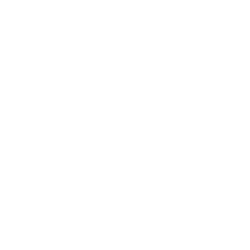

In [26]:
methane

In [10]:
# @title Check Your Understanding
%%html
<style>
div.orange-alert {
    color: #854f00; /* Darker shade of orange for text */
    background-color: #ffe6cc; /* Light orange background */
    border-left: 5px solid #ff9933; /* Bright orange border */
    padding: 0.5em;
    font-size: 1.25em; /* Matches the surrounding text size */
    line-height: 1.5; /* Ensures readability */
}
div.orange-alert ul {
    margin: 0.5em 0; /* Space around the list */
}
div.orange-alert li {
    margin-bottom: 0.5em; /* Space between list items */
}
</style>

<div class="orange-alert">

<p> Create RDKit molecules for the following molecules. You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a>:
<p>
    <ul>
        <li> Propane
        <li> Ethene
        <li> Cyclohexane
        <li> Benzene </li>
        <li> Acetic Acid
    </ul>
</p>
<p>Create variables for each molecule. The variable names should be the molecule name (all lowercase)</p>
</div>

In [11]:
# TO DO: Insert the SMILES string for propane: CCC

propane = Chem.MolFromSmiles("")

# TO DO: Insert the SMILES string for ethene

ethene = Chem.MolFromSmiles("")

 # TO DO: Call the method and insert the SMILES string for cyclohexane

cyclohexane = Chem.MolFromSmiles("")

# TO DO: Call the method and insert the SMILES string for benzene

benzene = Chem.MolFromSmiles("")

# The SMILES string for acetic acid is provided

acetic_acid = Chem.MolFromSmiles("CC(=O)O")

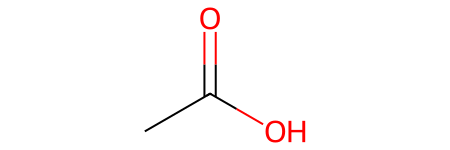

In [12]:
# Try visualizing your molecules here just by typing the name of the variable that refers to the RDKit mol object
acetic_acid

In [13]:
from rdkit.Chem.Draw import IPythonConsole as ipc
from rdkit.Chem import Draw

# Configuration for displaying in Jupyter notebooks
ipc.ipython_useSVG = True  # Use SVG for higher quality images
ipc.drawOptions.addAtomIndices = True  # Show atom indices
ipc.molSize = 250,250 # Set size of image

In [14]:
# @title Working with RDKit Molecules
%%html
<style>
div.purple-box {
    color: #4b0082; /* Indigo for text */
    background-color: #f3e5f5; /* Light lavender background */
    border-left: 5px solid #7b1fa2; /* Medium purple border */
    padding: 0.5em;
    font-size: 1.25em; /* Matches the surrounding text size */
    line-height: 1.5; /* Ensures readability */
    font-family: Arial, sans-serif; /* Clean, modern font */
}
div.purple-box ul {
    margin: 0.5em 0; /* Space around the list */
}
div.purple-box li {
    margin-bottom: 0.5em; /* Space between list items */
}
</style>

<div class="purple-box">
    <p>
RDKit molecule objects have a number of methods we can use to get more information about the molecule. In the next few cells, we'll look at some methods that can tell us some things about the molecules we've created. The next cell has settings for modifying drawing molecules. It adds labels of atom indices and sets the image size
When working with Python objects in the Jupyter notebook, you can
type a variable or object name to see the methods available on that object.
    </p>
    <p>
In the cell below, type
<pre>
  acetic_acid.

</pre>

Notice how there is a dot at the end

    <pre>
      .
    </pre>

Then press the `tab` key. A list of possible methods and attributes will come up.

Look through the methods until you find one that gives you the number of atoms in the molecule.

</div>

In [15]:
# TO DO: Pick a method that will tell you the number of atoms acetic acid has.
# Enter a . after acetic acid and then scroll down the list to find a method to give you the number of atoms

x = acetic_acid

print('Acetic acid has', x, 'heavy atoms.')

Acetic acid has <rdkit.Chem.rdchem.Mol object at 0x7c547ae06c00> heavy atoms.


### Finding help
When you start working with RDKit mol objects, it will be an adjustment. This is a new type of variable and it will take time to adjust. One way to find help is to use a simple help command where the object of the help function is the name of the RDKit mol object. In the next cell, we will use help to learn more about the RDKit mol object, acetic_acid, that we just created.

In [16]:
help(acetic_acid)

Help on Mol in module rdkit.Chem.rdchem object:

class Mol(Boost.Python.instance)
 |  The Molecule class.
 |  
 |  In addition to the expected Atoms and Bonds, molecules contain:
 |    - a collection of Atom and Bond bookmarks indexed with integers
 |        that can be used to flag and retrieve particular Atoms or Bonds
 |        using the {get|set}{Atom|Bond}Bookmark() methods.
 |  
 |    - a set of string-valued properties. These can have arbitrary string
 |        labels and can be set and retrieved using the {set|get}Prop() methods
 |        Molecular properties can be tagged as being *computed*, in which case
 |          they will be automatically cleared under certain circumstances (when the
 |          molecule itself is modified, for example).
 |        Molecules also have the concept of *private* properties, which are tagged
 |          by beginning the property name with an underscore (_).
 |  
 |  Method resolution order:
 |      Mol
 |      Boost.Python.instance
 |      bu

In [17]:
# Add an argument to your function to get the total number of atoms in acetic_acid including hydrogens
# This is the method we used in an earlier cell. Note that the parentheses are empty.

x = acetic_acid.GetNumAtoms()

# TO DO: To include the hydrogens in the atom count, insert the phrase onlyExplicit = False in the parentheses.

y = acetic_acid.GetNumAtoms()

print(f"There are {x} heavy atoms in acetic acid and {y} total atoms in acetic acid.")

There are 4 heavy atoms in acetic acid and 4 total atoms in acetic acid.


In [18]:
# @title Examining and Visualizing Data
%%html
<style>
div.alert {
    color: #0056b3;
    background-color: #d9edf7;
    border-left: 5px solid #31708f;
    padding: 0.5em;
    font-size: 1.25em;
    line-height: 1.5;
}
div.alert ul {
    margin: 0.5em 0;
}
div.alert li {
    margin-bottom: 0.5em;
}
</style>

<div class="alert alert-block alert-info">
    <strong>Questions:</strong>
    <ul>
        <li>How can I use pandas to work with molecules from rdkit?</li>
        <li>How can I visualize relationships between different parts of my data?</li>
   </ul>

    <strong>Objectives:</strong>
    <ul>
        <li>Review the pandas dataframe</li>
        <li>Learn to visualize structures in a pandas dataframe</li>
        <li>Learn the <i>apply</i> tool for expanding a pandas dataframe</li>
    </ul>
</div>

[Pandas](https://pandas.pydata.org/docs/) is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas.

The central data structure of pandas is called a DataFrame. Pandas DataFrames work very closely with NumPy arrays and Pandas dataframes are specifically for data which is two dimensional (rows and columns). NumPy arrays, while similar in some ways, can work with higher dimensional data.

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. We are going to be looking at a dataset which gives information about the elements in the periodic table.

In [19]:
import pandas as pd                                     # importing the pandas library

from rdkit.Chem import PandasTools                      # importing rdkit functions to work with pandas

PandasTools.RenderImagesInAllDataFrames(images=True)    # to display chemical structures in dataframes

In [20]:
from urllib.request import urlretrieve                  # importing a method that enables retrieval of a text file from a URL

url = ("https://raw.githubusercontent.com/MolSSI-Education/iqb-2025/refs/heads/paul/data/nsaids.csv")

filename = "nsaids.csv"

urlretrieve(url, filename)

('nsaids.csv', <http.client.HTTPMessage at 0x7c546a73ea10>)

## Loading a collection of small molecules

In the next few cells, we'll read a text file that lists the SMILES strings for some nonsteroidal antiinflammatory drugs (NSAIDS) and then use them to start building a pandas dataframe. The SMILES strings for the NSAIDS can be found in [nsaids.txt](https://docs.google.com/document/d/1RQeVIFBMeq4SWTrRNfgZXRvaaRNXVknLxgVZfTbJUDs/edit?usp=drive_link).


In [21]:
nsaids_file = "nsaids.csv"

nsaids_df = pd.read_csv(nsaids_file)

nsaids_df

,Name,SMILES
0,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O
1,Indomethacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...
2,Diclofenac,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl
3,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
4,Phenylbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3
5,Meloxicam,CC1=CN=C(S1)NC(=O)C2=C(C3=CC=CC=C3S(=O)(=O)N2C)O
6,Celecoxib,CC1=CC=C(C=C1)C2=CC(=NN2C3=CC=C(C=C3)S(=O)(=O)...
7,Oxyphenbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=C(C=C2)O)C3=CC=CC=C3
8,Ketoprofen,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O
9,Naproxen,C[C@@H](C1=CC2=C(C=C1)C=C(C=C2)OC)C(=O)O


### The `.apply` method

The `.apply` method in pandas is used to apply a function along a row or column of a dataframe.
This is useful when you have a custom function that you need to use on every value in a column, but there is not a NumPy or Pandas function for it.

For example, we could apply the `len` function to our `Name` column to get the number of letters in the name for each element.

```python
# Number of letters in name -
df["Name"].apply(len)
```

We are going to use ```apply``` to add a new column to nsaid_df that contains the rdkit molecule for each of the NSAIDs.

,Name,SMILES,Molecule
0,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O,
1,Indomethacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,
2,Diclofenac,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl,
3,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,
4,Phenylbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,

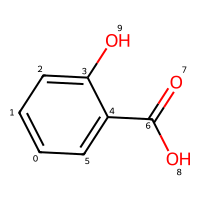
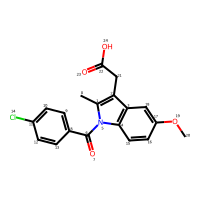
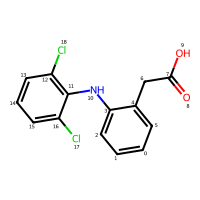
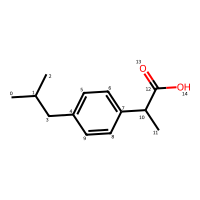
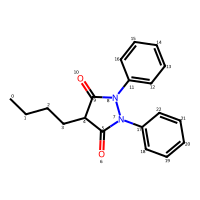

In [22]:
nsaids_df["Molecule"] = nsaids_df["SMILES"].apply(Chem.MolFromSmiles)

nsaids_df.head()

At this point, nsaid_df contains two columns: the SMILES string and the molecule. We will go one step further and use ```apply``` to add a few more columns to the dataframe that contains a descriptor based on the rdkit molecule. Before we can do that we need to import a new sublibrary from rdkit.Chem called Descriptors. Notice that the new columns will be based on the Molecule column, which contains RDKit mol objects.

,Name,SMILES,Molecule,Mol Wt,logP,HBD,HBA
0,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O,,138.122,1.09040,2,3
1,Indomethacin,CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)...,,357.793,3.92732,1,5
2,Diclofenac,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl,,296.153,4.36410,2,3
3,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,,206.285,3.07320,1,2
4,Phenylbutazone,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,,308.381,3.78780,0,4

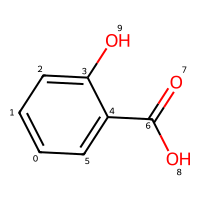
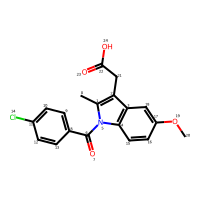
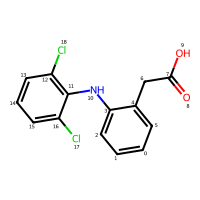
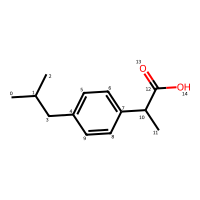
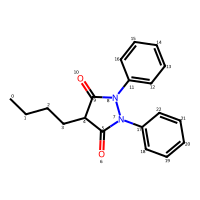

In [23]:
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
nsaids_df["Mol Wt"] = nsaids_df["Molecule"].apply(Descriptors.MolWt)
nsaids_df["logP"] = nsaids_df["Molecule"].apply(Descriptors.MolLogP)
nsaids_df["HBD"] = nsaids_df["Molecule"].apply(Lipinski.NHOHCount)            # Number of hydrogen bond donors
nsaids_df["HBA"] = nsaids_df["Molecule"].apply(Lipinski.NOCount)              # Number of hydrogen bond acceptors
nsaids_df.head()

array([[<Axes: title={'center': 'Mol Wt'}>,
        <Axes: title={'center': 'logP'}>],
       [<Axes: title={'center': 'HBD'}>, <Axes: title={'center': 'HBA'}>]],
      dtype=object)

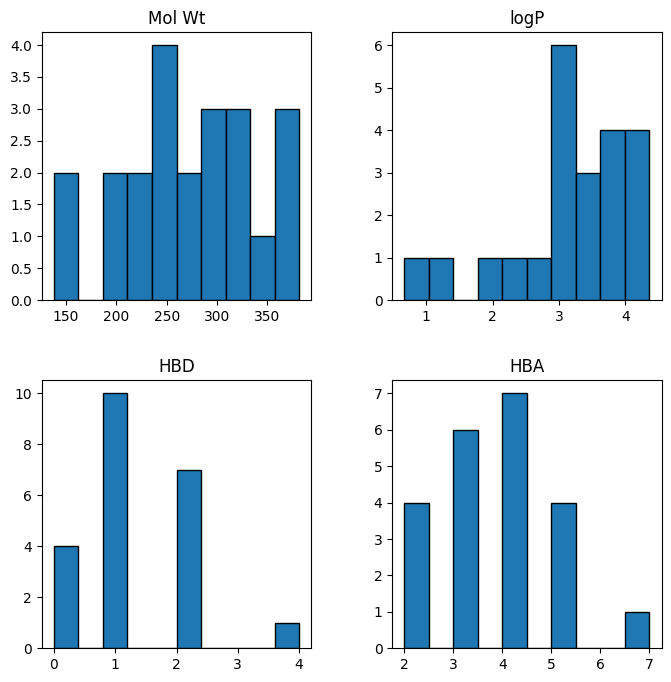

In [24]:
nsaids_df.hist(figsize=(8,8), edgecolor='black', grid=False)

<Axes: xlabel='Name'>

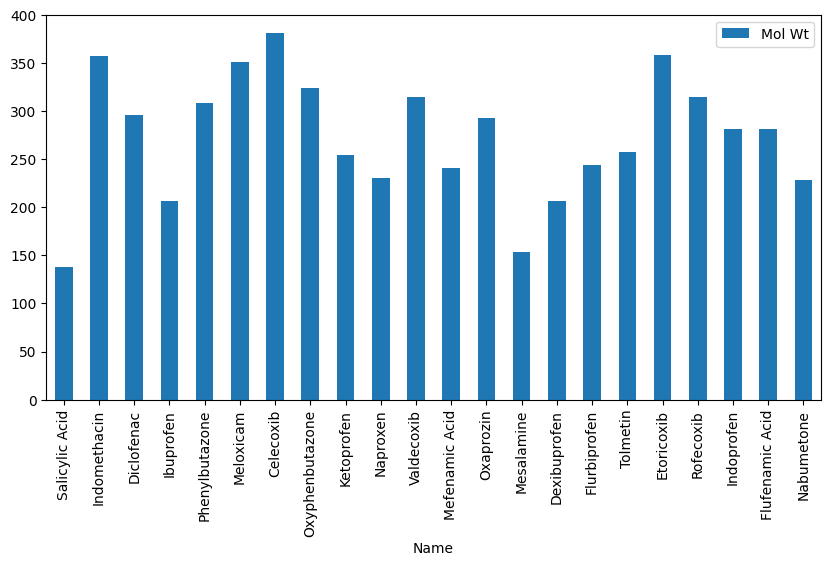

In [25]:
nsaids_df.plot.bar(x='Name', y='Mol Wt', figsize=(10,5))